<a href="https://colab.research.google.com/github/nehalmuthu/Covid-Simulation-in-Federated-Environment/blob/master/createTrainingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [36]:
import pandas as pd
import numpy as np
from scipy.io import savemat
import matplotlib.pyplot as plt 

In [37]:
df=pd.read_csv('/content/gdrive/MyDrive/FedLearningCovid/newideas/data/processed_US_data.csv')

In [38]:
st=df.sub_region_1.unique()
comp=[]
for i in st:
  m=(df[df['sub_region_1']==i].cases).mean()
  if m>1000 and m<1500:
    su=(df[df['sub_region_1']==i].cases).sum()
    print(i,su,m)
    comp.append(i)


Alabama 839947 1372.4624183006536
Colorado 793899 1280.4822580645161
Kentucky 768090 1240.8562197092083
Louisiana 765295 1242.362012987013
Massachusetts 879126 1375.7840375586854
Minnesota 847010 1368.3521809369952
Missouri 890463 1440.878640776699
Oklahoma 655511 1058.9838449111471
South Carolina 908837 1468.2342487883684
Washington 756733 1184.245696400626
Wisconsin 928389 1452.8779342723005


In [39]:

comp.remove('Missouri')
comp.remove('Massachusetts')
comp.remove('Oklahoma')
comp.remove('South Carolina')
comp.remove('Wisconsin')
comp.remove('Louisiana')


In [40]:

nam=comp.copy()
#  2021 april may june july
#dat=dat[dat['sub_region_1']==nam]
dat=df[df['sub_region_1'].isin(nam)].copy()


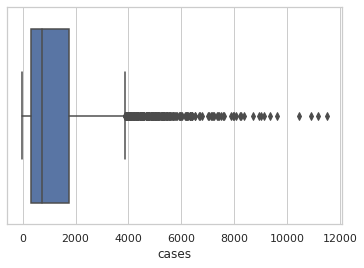

In [41]:
import seaborn
import pandas as pd

 
# use to set style of background of plot
seaborn.set(style="whitegrid")
 
# loading data-set

seaborn.boxplot(x = dat['cases'])


In [42]:

dat=dat[dat.cases<4000]
dat=dat[dat.cases>=0]



#5/1/2020 - 3/31/2021
dat=dat[dat['date']>='2020-04-01']
dat=dat[dat['date']<'2021-06-01']


dat=dat.reset_index()
dat=dat.drop('index',axis=1)




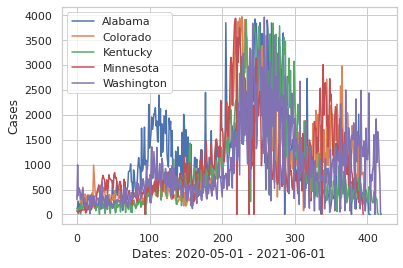

In [43]:
for nam in range(len(comp)):
  df=dat[dat["sub_region_1"]==comp[nam]]
  plt.plot(list(df.cases), label=comp[nam])
plt.xlabel('Dates: 2020-05-01 - 2021-06-01')
# naming the y axis
plt.ylabel('Cases')
plt.legend()
plt.show()


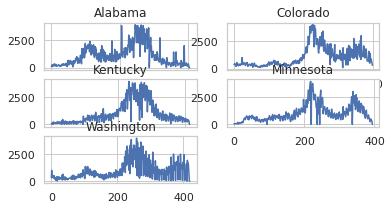

In [44]:
import matplotlib.pyplot as plt
for i in range(len(comp)):
  df=dat[dat["sub_region_1"]==comp[i]]
  plt.subplot(4,2,i+1)
  plt.title(comp[i])
  plt.plot(list(df.cases))

#plt.savefig('foo.png')



In [45]:
dat['ct']=1

dat.groupby('sub_region_1').sum().ct

sub_region_1
Alabama       405
Colorado      398
Kentucky      416
Minnesota     395
Washington    420
Name: ct, dtype: int64

In [46]:
dat=dat[['sub_region_1','retail_and_recreation_percent_change_from_baseline','grocery_and_pharmacy_percent_change_from_baseline','parks_percent_change_from_baseline',	'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline',	'residential_percent_change_from_baseline',	'cases']]

In [47]:

#Split into features and target (Price)
X = dat.drop(['cases'], axis = 1)
y = dat['cases']

In [48]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)


In [53]:
#saving fr baselie comparisons
pd.DataFrame(X_train).to_csv('x_train.csv',index=False)

s=pd.DataFrame(y_train)
s.to_csv('y_train.csv',index=False)

pd.DataFrame(X_test).to_csv('x_test.csv',index=False)

s=pd.DataFrame(y_test)
s.to_csv('y_test.csv',index=False)

In [50]:

pd.DataFrame(X_train.drop(['sub_region_1'], axis = 1)).to_csv('x.csv',index=False)

s=pd.DataFrame(y_train)
s.to_csv('y.csv',index=False)

df = pd.read_csv('x.csv')
df=df.astype("float")
x=df.fillna(0)
x=x.values
X=x.copy()

df=pd.read_csv('y.csv')
df=df.astype("float")
y=df.fillna(0)
y=y.values
Y=y.copy()


x=np.array_split(X,29)
y=np.array_split(Y,29)


x=np.array(x)

l=[]
l.append(x)
x=np.array(l)


y=np.array(y)
l=[]
l.append(y)
y=np.array(l)



data={'X': x, 'Y':y}

savemat('us-fewstates-outlier-till0621-29.mat', data, oned_as='row')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
